In [1]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import numpy as np
import os
from datetime import date
import datetime
from pathlib import Path
import seaborn as sns

In [2]:
caminho = r'Z:\Banco SIVEP Exportação'
lista_arquivos = os.listdir(caminho)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{caminho}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultimo_arquivo = lista_datas[0][1] #Pega o ultimo arquivo
ultimo_arquivo

'Banco SIVEP 12_12_2022 07_32_58.xlsx'

In [3]:
if not os.path.exists(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}'):
    os.makedirs(f'Z:\Graficos Boletim_Python/Gráficos {date.today().day}_{date.today().month}_{date.today().year}')

In [4]:
dados = pd.read_excel(f'{caminho}/{ultimo_arquivo}')
#dados = pd.read_excel('Z:/Banco SIVEP Exportação/Banco SIVEP 30_05_2022 09_48_25.xlsx')

In [5]:
dados['pos_pcrflu'] = dados['pos_pcrflu'].map({1:'Sim',2:'Nao',9:'Ignorado'})

In [6]:
dados['tp_flu_pcr'] = dados['tp_flu_pcr'].map({1:'Influenza',2:'Influenza'})

In [7]:
dados['pcr_fluasu'] = dados['pcr_fluasu'].map({1:'Influenza A(H1N1)pdm09',2:'Influenza A(H3N2)',3:'Influenza A nao subtipado',
4:'Influenza A nao subtipavel',5:'Inconclusivo',6:'Outro'})

In [8]:
filtro = dados[['Competencia Evolucao','Classificacao final','Evolucao','Idade','pos_pcrflu','tp_flu_pcr','pcr_fluasu',"pcr_vsr"]]
filtro

,Competencia Evolucao,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
0,2020_02,SRAG não especificado,Cura,31.0,NaN,NaN,NaN,NaN
1,2020_01,SRAG não especificado,Cura,19.0,NaN,NaN,NaN,NaN
2,2020_01,SRAG não especificado,Cura,0.0,NaN,NaN,NaN,NaN
3,2020_01,SRAG não especificado,Óbito,58.0,NaN,NaN,NaN,NaN
4,2020_02,SRAG não especificado,Cura,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
185526,2022_10,SRAG não especificado,Óbito,80.0,NaN,NaN,NaN,NaN
185527,NaN,COVID-19,Segue Internado,64.0,Nao,NaN,NaN,1.0
185528,NaN,SRAG não especificado,Ignorado,46.0,NaN,NaN,NaN,NaN
185529,2020_07,SRAG não especificado,Cura,85.0,NaN,NaN,NaN,NaN


In [9]:
for index, idade in filtro.iterrows():
    if idade['Idade'] < 12:
        filtro.loc[index,'Idade'] = '0-11 anos'
    elif idade['Idade'] < 20:
        filtro.loc[index,'Idade'] = '12-19 anos'
    elif idade['Idade'] < 40:
        filtro.loc[index,'Idade'] = '20-39 anos'
    elif idade['Idade'] < 60:
        filtro.loc[index,'Idade'] = '40-59 anos'
    elif idade['Idade'] < 80:
        filtro.loc[index,'Idade'] = '60-79 anos'
    elif idade['Idade'] < 150:
        filtro.loc[index,'Idade'] = '80 e mais'

C:\Users\ryan-rosa\AppData\Local\Temp\ipykernel_12804\4269199503.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtro.loc[index,'Idade'] = '20-39 anos'


In [10]:
filtro = filtro.loc[filtro['pos_pcrflu']=='Sim']
filtro = filtro.loc[filtro['Evolucao']=='Óbito']
filtro

,Competencia Evolucao,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
16066,2021_03,COVID-19,Óbito,60-79 anos,Sim,NaN,NaN,NaN
32480,2022_02,SRAG por influenza,Óbito,60-79 anos,Sim,Influenza,Influenza A(H3N2),NaN
32532,2022_01,SRAG por influenza,Óbito,80 e mais,Sim,Influenza,Influenza A nao subtipado,NaN
32859,2022_01,SRAG por influenza,Óbito,60-79 anos,Sim,Influenza,Influenza A nao subtipado,NaN
32903,2022_01,SRAG por influenza,Óbito,60-79 anos,Sim,Influenza,Influenza A nao subtipado,NaN
...,...,...,...,...,...,...,...,...
173324,2022_06,COVID-19,Óbito,60-79 anos,Sim,Influenza,Influenza A(H3N2),NaN
177281,2022_08,SRAG por influenza,Óbito,80 e mais,Sim,Influenza,Influenza A(H3N2),NaN
182936,2022_06,COVID-19,Óbito,60-79 anos,Sim,Influenza,Influenza A(H3N2),NaN
185402,2022_03,SRAG por influenza,Óbito,60-79 anos,Sim,Influenza,Influenza A(H3N2),NaN


In [11]:
total_obitos = filtro.groupby('Competencia Evolucao').count()
total_obitos.head()

,Classificacao final,Evolucao,Idade,pos_pcrflu,tp_flu_pcr,pcr_fluasu,pcr_vsr
Competencia Evolucao,,,,,,,
2020_01,1,1,1,1,1,0,0
2020_03,1,1,1,1,1,1,0
2021_03,1,1,1,1,0,0,0
2021_12,3,3,3,3,3,3,0
2022_01,34,34,34,34,34,34,0


In [12]:
separaIdade = filtro.groupby(['Idade','Competencia Evolucao']).count()
separaIdade.head()

Classificacao final  Evolucao  pos_pcrflu  \
Idade      Competencia Evolucao                                              
0-11 anos  2020_01                                 1         1           1   
           2022_05                                 2         2           2   
20-39 anos 2022_01                                 2         2           2   
           2022_02                                 1         1           1   
           2022_03                                 1         1           1   

                                 tp_flu_pcr  pcr_fluasu  pcr_vsr  
Idade      Competencia Evolucao                                   
0-11 anos  2020_01                        1           0        0  
           2022_05                        2           2        0  
20-39 anos 2022_01                        2           2        0  
           2022_02                        1           1        0  
           2022_03                        1           1        0

In [13]:
idade11 = separaIdade.reset_index()
idade11 = idade11.loc[idade11['Idade']=='0-11 anos']
idade11 = idade11.set_index('Competencia Evolucao')
idade11['Proporcao'] = idade11['Evolucao']/total_obitos['Evolucao']*100
idade11 = idade11.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade11 = idade11.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade11['Proporcao'] = idade11['Proporcao'].fillna(0)
idade11 = idade11['2021_12':]
idade11.loc['2022_10'] = 0 
idade11 = idade11['Proporcao']
idade11.tail(8)

Competencia Evolucao
2022_04     0.000000
2022_05    11.111111
2022_06     0.000000
2022_07     0.000000
2022_08     0.000000
2022_09     0.000000
2022_11     0.000000
2022_10     0.000000
Name: Proporcao, dtype: float64

In [14]:
idade19 = separaIdade.reset_index()
idade19 = idade19.loc[idade19['Idade']=='12-19 anos']
idade19 = idade19.set_index('Competencia Evolucao')
idade19['Proporcao'] = idade19['Evolucao']/total_obitos['Evolucao']*100
idade19 = idade19.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade19 = idade19.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade19['Proporcao'] = idade19['Proporcao'].fillna(0)
idade19 = idade19['2021_12':]
idade19.loc['2022_10'] = 0 
idade19 = idade19['Proporcao']
idade19.tail(8)

Competencia Evolucao
2022_04    0.0
2022_05    0.0
2022_06    0.0
2022_07    0.0
2022_08    0.0
2022_09    0.0
2022_11    0.0
2022_10    0.0
Name: Proporcao, dtype: float64

In [15]:
idade39 = separaIdade.reset_index()
idade39 = idade39.loc[idade39['Idade']=='20-39 anos']
idade39 = idade39.set_index('Competencia Evolucao')
idade39['Proporcao'] = idade39['Evolucao']/total_obitos['Evolucao']*100
idade39 = idade39.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade39 = idade39.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade39['Proporcao'] = idade39['Proporcao'].fillna(0)
idade39 = idade39['2021_12':]
idade39.loc['2022_10'] = 0 
idade39 = idade39['Proporcao']
idade39.tail(8)

Competencia Evolucao
2022_04     0.000000
2022_05    11.111111
2022_06     3.703704
2022_07     6.666667
2022_08     0.000000
2022_09     0.000000
2022_11     0.000000
2022_10     0.000000
Name: Proporcao, dtype: float64

In [16]:
idade59 = separaIdade.reset_index()
idade59 = idade59.loc[idade59['Idade']=='40-59 anos']
idade59 = idade59.set_index('Competencia Evolucao')
idade59['Proporcao'] = idade59['Evolucao']/total_obitos['Evolucao']*100
idade59 = idade59.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade59 = idade59.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade59['Proporcao'] = idade59['Proporcao'].fillna(0)
idade59 = idade59['2021_12':]
idade59.loc['2022_10'] = 0 
idade59 = idade59['Proporcao']
idade59.tail(8)

Competencia Evolucao
2022_04      0.000000
2022_05     16.666667
2022_06     11.111111
2022_07      6.666667
2022_08      0.000000
2022_09      0.000000
2022_11    100.000000
2022_10      0.000000
Name: Proporcao, dtype: float64

In [17]:
idade79 = separaIdade.reset_index()
idade79 = idade79.loc[idade79['Idade']=='60-79 anos']
idade79 = idade79.set_index('Competencia Evolucao')
idade79['Proporcao'] = idade79['Evolucao']/total_obitos['Evolucao']*100
idade79 = idade79.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade79 = idade79.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade79['Proporcao'] = idade79['Proporcao'].fillna(0)
idade79 = idade79['2021_12':]
idade79.loc['2022_10'] = 0 
idade79 = idade79['Proporcao']
idade79.tail(8)

Competencia Evolucao
2022_04    100.000000
2022_05     33.333333
2022_06     40.740741
2022_07     46.666667
2022_08     66.666667
2022_09    100.000000
2022_11      0.000000
2022_10      0.000000
Name: Proporcao, dtype: float64

In [18]:
idade80 = separaIdade.reset_index()
idade80 = idade80.loc[idade80['Idade']=='80 e mais']
idade80 = idade80.set_index('Competencia Evolucao')
idade80['Proporcao'] = idade80['Evolucao']/total_obitos['Evolucao']*100
idade80 = idade80.merge(total_obitos,how='outer',right_index=True, left_index=True)
idade80 = idade80.drop(columns=['Evolucao_y','Classificacao final_y','Evolucao_y','Idade_y'])
idade80['Proporcao'] = idade80['Proporcao'].fillna(0)
idade80 = idade80['2021_12':]
idade80.loc['2022_10'] = 0 
idade80 = idade80['Proporcao']
idade80.tail(8)

Competencia Evolucao
2022_04     0.000000
2022_05    27.777778
2022_06    44.444444
2022_07    40.000000
2022_08    33.333333
2022_09     0.000000
2022_11     0.000000
2022_10     0.000000
Name: Proporcao, dtype: float64

In [19]:
eixo_x = idade80.to_frame()
eixo_x = eixo_x.reset_index()
eixo_x = eixo_x['Competencia Evolucao']
eixo_x

0     2021_12
1     2022_01
2     2022_02
3     2022_03
4     2022_04
5     2022_05
6     2022_06
7     2022_07
8     2022_08
9     2022_09
10    2022_11
11    2022_10
Name: Competencia Evolucao, dtype: object

In [20]:
legenda = pd.DataFrame(columns=['0-11','12-19','20-39','40-59','60-79','80 e mais'])

In [21]:
pasta = r'Z:\Graficos Boletim_Python'
lista_arquivos = os.listdir(pasta)
lista_datas = []

for arquivo in lista_arquivos:
    #Descobrir a data desse arquivo
    data = os.path.getmtime(f'{pasta}/{arquivo}')
    lista_datas.append((data,arquivo))

lista_datas.sort(reverse=True) #Vai ordenar a lista em ordem decrescente com reverse=True Obs: Ele ordena sempre com o primeiro valor, por isso colocamos data antes de arquivo
ultima_pasta = lista_datas[0][1] #Pega o ultimo arquivo
ultima_pasta

'Gráficos 13_12_2022'

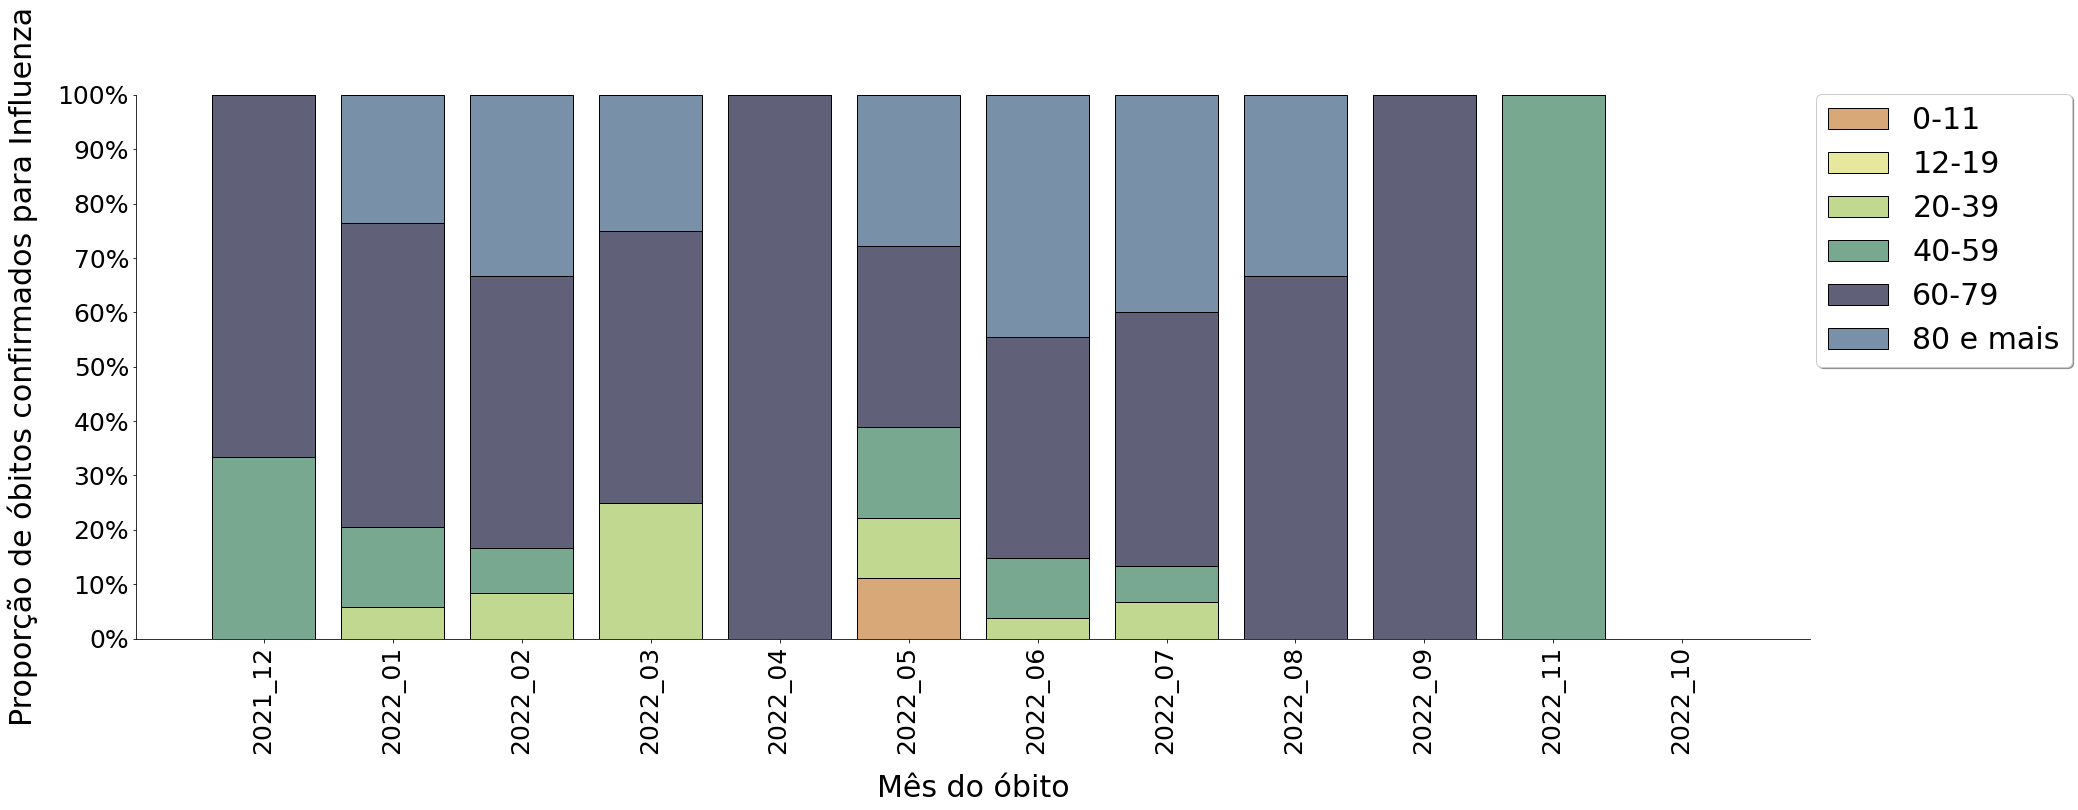

In [22]:
plt.figure(figsize=(30,10))
plt.bar(eixo_x,idade11, color='#d8a878',edgecolor='#000000')
plt.bar(eixo_x,idade19, bottom=idade11, color="#e7e79d",edgecolor='#000000')
plt.bar(eixo_x,idade39, bottom=idade11 + idade19, color='#c0d890',edgecolor='#000000')
plt.bar(eixo_x,idade59, bottom=np.array(idade11) + np.array(idade19) + np.array(idade39), color='#78a890',edgecolor='#000000')
plt.bar(eixo_x,idade79, bottom=idade11 + idade19 + idade39 + idade59, color='#606078',edgecolor='#000000')
plt.bar(eixo_x,idade80, bottom=idade11 + idade19 + idade39 + idade59 + idade79, color='#7890a8',edgecolor='#000000')
sns.despine()
plt.xticks(rotation=90,fontsize=25)
plt.xlabel('Mês do óbito',fontsize=30,labelpad=20)
plt.yticks(np.arange(0,110,10),fontsize=25)
plt.ylabel('Proporção de óbitos confirmados para Influenza',fontsize=30,labelpad=20)
plt.gca().set_yticklabels(['{:.0f}%'.format(x*1) for x in plt.gca().get_yticks()])
plt.legend(legenda,loc='upper center',fancybox=True,bbox_to_anchor=(1.08,1.03),fontsize=30,shadow=True)
plt.savefig(f'Z:/Graficos Boletim_Python/{ultima_pasta}/proporcaoObito_Influ.png',dpi=720,bbox_inches='tight')